# Thyroid Disease - Data Analysis

## Project Description:
Thyroid nodules are not uncommon whose incidence is increasing globally and the most common one is hypothyroidism. In hypothyroidism, the thyroid gland is underperforming or producing too little thyroid hormone. 

In its early stages, hypothyroidism may not cause any noticeable symptoms. Over time, untreated hypothyroidism can lead to cause a number of health problems, such as obesity, joint pain, infertility and heart disease. So it is important to recognize the symptoms of hypothyroidism and early detection and treatment.

The thyroid gland is located at the front of the neck. It secretes two hormones known as thyroxine (T4) and tri-iodothyronine (T3). The release of T4 and T3 into the blood is controlled by a third hormone called thyroid stimulating hormone (TSH), this hormone is responsible for keeping FT4 and FT3 at the right levels. Collectively, these three hormones are referred to as ‘thyroid function tests’ (TFTs).

The project will analyse the personal information and their hormonal indicators of the thyroid to detect whether they have hypothyroidism disease, using data to speak for itself. It is divided into three steps, project preparation - first introduction to the data - data analysis.  
- The project preparation section imports the modules used and loads the data
- The first look at the data section looks at the basic information and descriptive statistical characteristics of the data
- The Data Analysis section analyses the types of Thyroid gland and distinguishing hyperthyroid and hypothyroid

<img src="https://i.imgur.com/5cW3lGZ.gif?noredirect" width="800px">

In [855]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

# Read dataset

In [856]:
# read dataset
data = pd.read_csv('Dataset_edited/new_data.csv')

In [857]:
data.head(10)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,Target
0,41.0,F,f,f,f,f,f,f,f,f,f,f,f,1.30,2.5,125.0,1.14,109.0,negative
1,23.0,F,f,f,f,f,f,f,f,f,f,f,f,4.10,2.0,102.0,NaN,NaN,negative
2,46.0,M,f,f,f,f,f,f,f,f,f,f,f,0.98,NaN,109.0,0.91,120.0,negative
3,70.0,F,t,f,f,f,f,f,f,f,f,f,f,0.16,1.9,175.0,NaN,NaN,negative
4,70.0,F,f,f,f,f,f,f,f,f,f,f,f,0.72,1.2,61.0,0.87,70.0,negative
5,18.0,F,t,f,f,f,f,f,f,f,f,f,f,0.03,NaN,183.0,1.30,141.0,negative
6,59.0,F,f,f,f,f,f,f,f,f,f,f,f,NaN,NaN,72.0,0.92,78.0,negative
7,80.0,F,f,f,f,f,f,f,f,f,f,f,f,2.20,0.6,80.0,0.70,115.0,negative
8,66.0,F,f,f,f,f,f,f,f,f,f,f,t,0.60,2.2,123.0,0.93,132.0,negative
9,68.0,M,f,f,f,f,f,f,f,f,f,f,f,2.40,1.6,83.0,0.89,93.0,negative


In [858]:
data.shape

(25453, 19)

# Univariate data analysis

In [859]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25453 entries, 0 to 25452
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        25005 non-null  float64
 1   sex                        24830 non-null  object 
 2   on_thyroxine               25453 non-null  object 
 3   query_on_thyroxine         25453 non-null  object 
 4   on_antithyroid_medication  25453 non-null  object 
 5   sick                       25453 non-null  object 
 6   pregnant                   25453 non-null  object 
 7   thyroid_surgery            25453 non-null  object 
 8   query_hypothyroid          25453 non-null  object 
 9   query_hyperthyroid         25453 non-null  object 
 10  lithium                    25453 non-null  object 
 11  goitre                     25453 non-null  object 
 12  tumor                      25453 non-null  object 
 13  TSH                        23525 non-null  flo

### Data infomation
1. The size: 3.7+ MB
2. 25453 instances
3. 19 columns

## Data set description:
<!-- * Kaggle[Data sets provided](https://www.kaggle.com/datasets/yasserhessein/thyroid-disease-data-set)
From Garavan Institute
Documentation: as given by Ross Quinlan
6 databases from the Garavan Institute in Sydney, Australia
Approximately the following for each database:

2800 training (data) instances and 972 test instances
Plenty of missing data
29 or so attributes, either Boolean or continuously-valued

The various hormonal indicators and personal information are saved in a CSV file format. -->

* Data Dictionary
    * **age**: continous, float64
    * **sex**: Femal(F) or Male(M)
    * **on thyroxine**: t/f
    * **query on thyroxine**: t/f
    * **on antithyroid medication**: t/f
    * **sick**: t/f
    * **pregnant**: t/f
    * **thyroid surgery**: t/f
    * **I131 treatment**: t/f
    * **query hypothyroid**: t/f
    * **query hyperthyroid**: t/f
    * **lithium**: t/f
    * **goitre**: t/f
    * **tumor**: t/f
    * **TSH**: Thyroid Stimulating Hormone, float64
    * **T3**: Triiodothyronine which is a hormone that the thyroid gland produces, float64
    * **TT4**: Thyroxine which is a type of thyroid hormone that regulates metabolism, float64
    * **T4U**: , float64
    * **FTI**: Free T4 Index, float64
    * **Target**: negative, hyperthyroid, hypothyroid

In [860]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI
count,25005.000000,23525.000000,21011.000000,24388.000000,23755.000000,23767.000000
mean,59.693784,3.871701,2.001304,78.715715,3.648765,81.067773
std,717.289620,21.055815,0.821120,53.464618,4.183175,57.142210
min,1.000000,0.000000,0.000000,0.200000,0.000000,0.000000
25%,36.000000,0.150000,1.600000,13.500000,0.910000,13.300000
50%,54.000000,0.660000,2.000000,90.000000,1.050000,95.000000
75%,67.000000,2.000000,2.300000,114.000000,8.300000,116.000000
max,65526.000000,530.000000,18.000000,450.000000,23.300000,881.000000


## Handle Missing Value

In [861]:
data.isnull().sum()

age                           448
sex                           623
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
TSH                          1928
T3                           4442
TT4                          1065
T4U                          1698
FTI                          1686
Target                          0
dtype: int64

### _age_ missing value

In [862]:
(data.shape[0]-data['age'].count())/data.shape[0]

0.01760106863631006

In [863]:
data.groupby(['age'])[['Target']].count()

,Target
age,
1.0,38
2.0,22
3.0,4
4.0,8
5.0,6
...,...
98.0,1
455.0,3
65511.0,1


It is impossible that age is more than 100. Therefore, delete these data

In [864]:
data = data.drop(data[data['age']>100].index)

In [865]:
data.shape

(25447, 19)

In [866]:
data[data['age'].isna()].count()

age                            0
sex                          392
on_thyroxine                 448
query_on_thyroxine           448
on_antithyroid_medication    448
sick                         448
pregnant                     448
thyroid_surgery              448
query_hypothyroid            448
query_hyperthyroid           448
lithium                      448
goitre                       448
tumor                        448
TSH                          406
T3                           389
TT4                          419
T4U                          419
FTI                          419
Target                       448
dtype: int64

In [867]:
data.groupby(['age'])[['Target']].count()

,Target
age,
1.0,38
2.0,22
3.0,4
4.0,8
5.0,6
...,...
93.0,13
94.0,9
95.0,4


In [868]:
data.age.count()

24999

1. The missing rate is: 1.76%
2. The number of missing value: 448
3. The number of non-missing value: 24999

### _Sex_ missing value

In [869]:
(data.shape[0]-data['sex'].count())/data.shape[0]

0.02448225724053916

In [870]:
data[data['sex'].isna()].count()

age                          567
sex                            0
on_thyroxine                 623
query_on_thyroxine           623
on_antithyroid_medication    623
sick                         623
pregnant                     623
thyroid_surgery              623
query_hypothyroid            623
query_hyperthyroid           623
lithium                      623
goitre                       623
tumor                        623
TSH                          553
T3                           491
TT4                          571
T4U                          549
FTI                          549
Target                       623
dtype: int64

In [871]:
data.sex.count()

24824

In [872]:
data.groupby(['sex'])[['Target']].count()

,Target
sex,
F,17047
M,7777


1. The missing rate is: 2.448%
2. The number of missing value: 623
3. The number of non-missing value: 24824 (17047 Female and 7777 Male)

### _TSH_ Missing Value

In [873]:
(data.shape[0]-data['TSH'].count())/data.shape[0]

0.07576531614728652

In [874]:
data[data['TSH'].isna()].count()

age                          1886
sex                          1858
on_thyroxine                 1928
query_on_thyroxine           1928
on_antithyroid_medication    1928
sick                         1928
pregnant                     1928
thyroid_surgery              1928
query_hypothyroid            1928
query_hyperthyroid           1928
lithium                      1928
goitre                       1928
tumor                        1928
TSH                             0
T3                            457
TT4                           985
T4U                           958
FTI                           958
Target                       1928
dtype: int64

In [875]:
data.TSH.count()

23519

1. TSH missing rate: 7.577%
2. TSH missed 1928 instances
3. Non-missing: 23519 instances

### _T3_ Missing Value

In [876]:
(data.shape[0]-data['T3'].count())/data.shape[0]

0.17451958973552875

In [877]:
data[data['T3'].isna()].count()

age                          4382
sex                          4309
on_thyroxine                 4441
query_on_thyroxine           4441
on_antithyroid_medication    4441
sick                         4441
pregnant                     4441
thyroid_surgery              4441
query_hypothyroid            4441
query_hyperthyroid           4441
lithium                      4441
goitre                       4441
tumor                        4441
TSH                          2970
T3                              0
TT4                          3524
T4U                          3510
FTI                          3511
Target                       4441
dtype: int64

In [878]:
data.T3.count()

21006

1. T3 missing rate: 17.452%
2. T3 missed 4441 instances
3. Non-missing: 21006 instances

### _TT4_ Missing Value

In [879]:
(data.shape[0]-data['TT4'].count())/data.shape[0]

0.041851691751483476

In [880]:
data[data['TT4'].isna()].count()

age                          1036
sex                          1013
on_thyroxine                 1065
query_on_thyroxine           1065
on_antithyroid_medication    1065
sick                         1065
pregnant                     1065
thyroid_surgery              1065
query_hypothyroid            1065
query_hyperthyroid           1065
lithium                      1065
goitre                       1065
tumor                        1065
TSH                           122
T3                            148
TT4                             0
T4U                             9
FTI                            17
Target                       1065
dtype: int64

In [881]:
data.TT4.count()

24382

1. TT4 missing rate: 4.185%
2. TT4 missed 1065 instances
3. Non-missing: 24382 instances

### _T4U_ Missing Value

In [882]:
(data.shape[0]-data['T4U'].count())/data.shape[0]

0.06672692262349196

In [883]:
data[data['T4U'].isna()].count()

age                          1669
sex                          1624
on_thyroxine                 1698
query_on_thyroxine           1698
on_antithyroid_medication    1698
sick                         1698
pregnant                     1698
thyroid_surgery              1698
query_hypothyroid            1698
query_hyperthyroid           1698
lithium                      1698
goitre                       1698
tumor                        1698
TSH                           728
T3                            767
TT4                           642
T4U                             0
FTI                            13
Target                       1698
dtype: int64

In [884]:
data.T4U.count()

23749

1. T4U missing rate: 6.673%
2. T4U missed 1698 instances
3. Non-missing: 23749 instances

### _FTI_ Missing Value

In [885]:
(data.shape[0]-data['FTI'].count())/data.shape[0]

0.06625535426572877

In [886]:
data[data['FTI'].isna()].count()

age                          1657
sex                          1612
on_thyroxine                 1686
query_on_thyroxine           1686
on_antithyroid_medication    1686
sick                         1686
pregnant                     1686
thyroid_surgery              1686
query_hypothyroid            1686
query_hyperthyroid           1686
lithium                      1686
goitre                       1686
tumor                        1686
TSH                           716
T3                            756
TT4                           638
T4U                             1
FTI                             0
Target                       1686
dtype: int64

In [887]:
data.FTI.count()

23761

1. FTI missing rate: 6.626%
2. FTI missed 1686 instances
3. Non-missing: 23761 instances

# Handling the Missing Value

#### According to the results we get from the data, we know that there are plenty of Negative class data. Therefore, if the missing value corresponding to the negative class, drop it. Otherwise, fill it using the mean value this column.

#### Drop some nan value first

In [888]:
ori_shape = data.shape
ori_shape

(25447, 19)

In [889]:
# If the class is negative, drop it
drop_columns = ['age', 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

for col in drop_columns:
    pre_shape = data.shape
    data = data.drop(data[(data['Target'] == 'negative') & (data[col].isnull())].index)
    print(col, ": we have dropped", pre_shape[0] - data.shape[0], "instances")

age : we have dropped 433 instances
sex : we have dropped 511 instances
TSH : we have dropped 1784 instances
T3 : we have dropped 2623 instances
TT4 : we have dropped 26 instances
T4U : we have dropped 515 instances
FTI : we have dropped 0 instances


In [890]:
print("The number of original instances:", ori_shape[0])
print("After dropping, the number of final instances:", data.shape[0])
print("We have dropped", ori_shape[0]-data.shape[0], "totally")

The number of original instances: 25447
After dropping, the number of final instances: 19555
We have dropped 5892 totally


#### Fill nan by mean value

In [891]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19555 entries, 0 to 25452
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        19540 non-null  float64
 1   sex                        19497 non-null  object 
 2   on_thyroxine               19555 non-null  object 
 3   query_on_thyroxine         19555 non-null  object 
 4   on_antithyroid_medication  19555 non-null  object 
 5   sick                       19555 non-null  object 
 6   pregnant                   19555 non-null  object 
 7   thyroid_surgery            19555 non-null  object 
 8   query_hypothyroid          19555 non-null  object 
 9   query_hyperthyroid         19555 non-null  object 
 10  lithium                    19555 non-null  object 
 11  goitre                     19555 non-null  object 
 12  tumor                      19555 non-null  object 
 13  TSH                        19508 non-null  flo

In [892]:
fill_columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'] #sex is not continous

for col in fill_columns:
    data[col].fillna(data[col].mean(), inplace=True)

In [893]:
# For sex
data[data['pregnant']=='t']['sex'].value_counts()

F    238
Name: sex, dtype: int64

All the sex is F if she has pregnant.

In [894]:
# for sex, fill it by F (Female). Because female patients more than male
data['sex'].fillna('F', inplace=True)

In [895]:
data.shape

(19555, 19)

In [896]:
data.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Target                       0
dtype: int64

### After handling missing value, the shape of this data is: [19555 instances and 19 artributes]

In [897]:
# export this dataset
data.to_csv('Dataset_edited/noMissing_data.csv', index=False, header=True)

##### 先填空，再分析，因为原始数据有2w，缺失的只占100-300，所以影响应该不大

# Data Distribution

### Statistical infomation

In [898]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI
count,19555.000000,19555.000000,19555.000000,19555.000000,19555.000000,19555.00000
mean,52.681273,4.119797,1.994549,71.281641,4.238252,73.27162
std,18.845595,22.412117,0.812630,54.996711,4.396264,56.09667
min,1.000000,0.000000,0.000000,0.200000,0.000000,0.00000
25%,37.000000,0.130000,1.600000,11.600000,0.930000,11.90000
50%,55.000000,0.500000,2.000000,83.000000,1.100000,88.00000
75%,68.000000,1.900000,2.300000,110.000000,9.000000,113.00000
max,98.000000,530.000000,18.000000,450.000000,23.300000,839.00000


## Positive(hypothyroid, hyperthyroid) vs Negative label

The number of target：
negative        17702
hypothyroid      1403
hyperthyroid      450
Name: Target, dtype: int64


Text(0.5, 1.0, 'Distribution for Target variable')

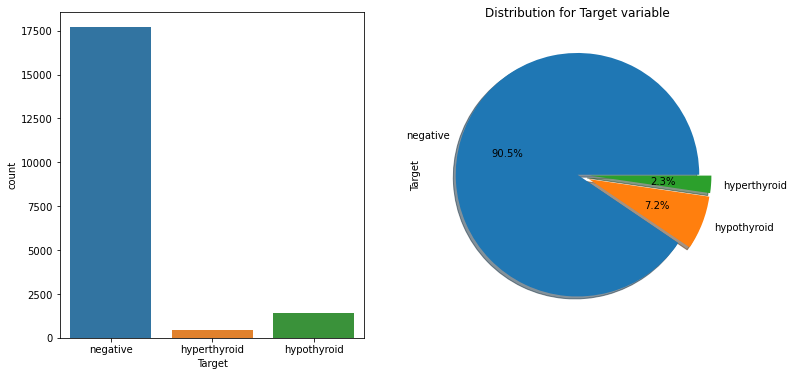

In [899]:
print('The number of target：')
print(data.Target.value_counts())

_,axe = plt.subplots(1,2,figsize=(12,6))
sns.countplot('Target',data=data,ax=axe[0])
data.Target.value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0,0.1,0.1],ax=axe[1])
plt.title("Distribution for Target variable")

As can be seen from the above graph, the distribution of samples is uneven and certain measures are needed to deal with the sample imbalance:

- Similar to undersampling, a positive sample and a negative sample are combined to form a multi-sample training set, and multiple models are trained and averaged
- Adjusting the weights of the model

### Distribution for other variables of positive class

In [900]:
positive_df = data.loc[data.Target.isin(['hyperthyroid','hypothyroid'])]

Text(0.5, 1.0, 'Distribution of Positive Class Based on Age')

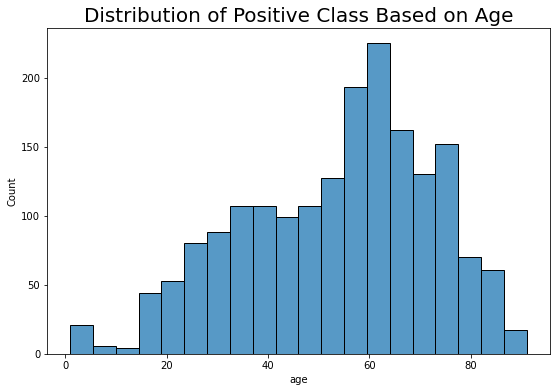

In [901]:
plt.figure(figsize=(9,6))
sns.histplot(x='age',data=positive_df)
plt.title("Distribution of Positive Class Based on Age", {'fontsize':20})

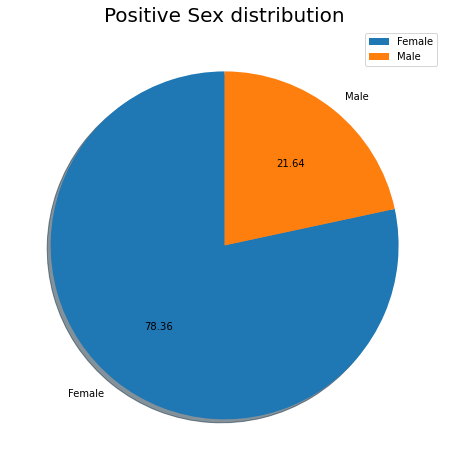

In [902]:
plt.figure(figsize=(8,8))
plt.pie(x=positive_df.sex.value_counts(), labels=['Female','Male'], startangle=90,autopct='%.2f',shadow=True)
plt.title("Positive Sex distribution", {'fontsize':20})
plt.legend()
# 如何有理由的证明，女生比男生患病率高

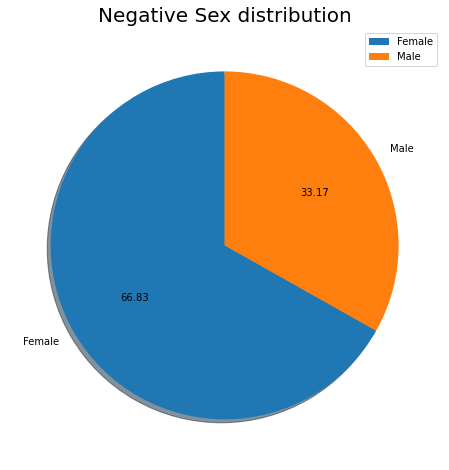

In [903]:
negative_df = data.loc[data.Target.isin(['negative'])]

plt.figure(figsize=(8,8))
plt.pie(x=negative_df.sex.value_counts(), labels=['Female','Male'], startangle=90,autopct='%.2f',shadow=True)
plt.title("Negative Sex distribution", {'fontsize':20})
plt.legend()

In [904]:
positive_df.sick.value_counts()

f    1801
t      52
Name: sick, dtype: int64

In [905]:
negative_df.sick.value_counts()

f    16982
t      720
Name: sick, dtype: int64

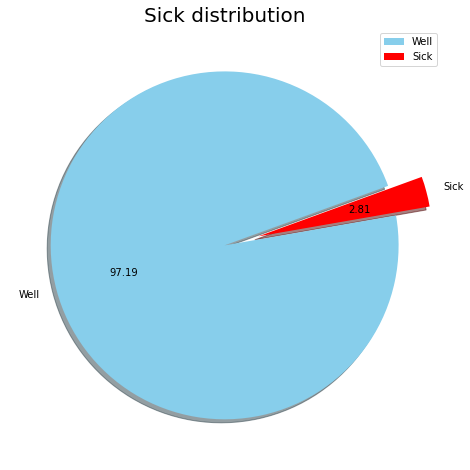

In [906]:
plt.figure(figsize=(8,8))
plt.pie(x=positive_df.sick.value_counts(),labels=['Well','Sick'],autopct='%.2f',startangle=20,colors=['skyblue','red'],shadow=True,explode=[0,0.2])
plt.title("Sick distribution", {'fontsize':20})
plt.legend()

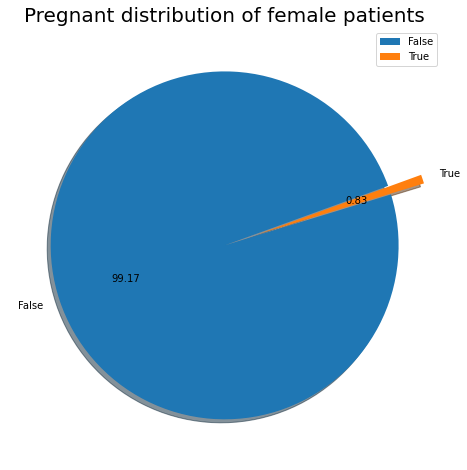

In [907]:
female_df = positive_df[positive_df.sex == 'F']
# female_df = data[data.sex == 'F']
plt.figure(figsize=(8,8))
plt.pie(x=female_df.pregnant.value_counts(), labels=['False','True'], startangle=20,autopct='%.2f',shadow=True,explode=[0,0.2])
plt.title("Pregnant distribution of female patients", {'fontsize':20})
plt.legend()
# 关于怀孕的数据可以有些结论，比如甲低更多等。。。！之后再进行考证

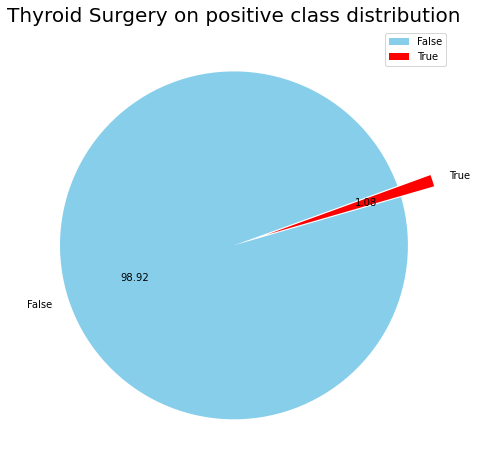

In [908]:
plt.figure(figsize=(8,8))
plt.pie(x=positive_df['thyroid_surgery'].value_counts(),labels=['False','True'],autopct='%.2f',startangle=20,colors=['skyblue','red'],explode=[0,0.2])
plt.title("Thyroid Surgery on positive class distribution", {'fontsize':20})
plt.legend()

In [909]:
has_thyroid_surgery = data.loc[data['thyroid_surgery'].isin(['t'])]
has_thyroid_surgery['Target'].value_counts()

negative        288
hypothyroid      16
hyperthyroid      4
Name: Target, dtype: int64

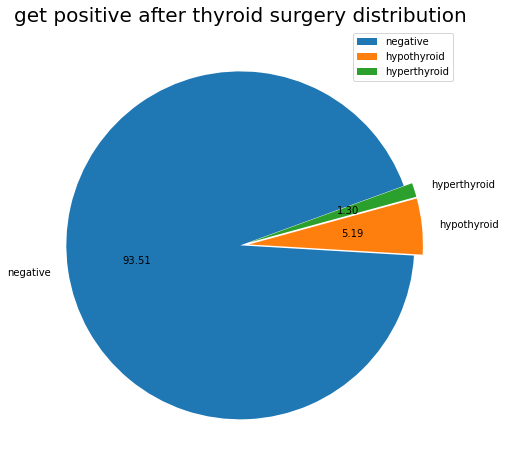

In [910]:
plt.figure(figsize=(8,8))
plt.pie(x=has_thyroid_surgery['Target'].value_counts(),labels=['negative','hypothyroid','hyperthyroid'],autopct='%.2f',startangle=20,explode=[0,0.05,0.05])
plt.title("get positive after thyroid surgery distribution", {'fontsize':20})
plt.legend()

#### There is 6.49% patients suffering thyroid disease after they have done thyroid surgery. Therefore, 做了手术不一定能完全康复，印证了“保守治疗”这样的一个说法，因为这里的数据和上面的整体数据来比较，是一样的分布状态，也就是没什么变化。可以用统计分析来验证

#### Results:
- The age distribution is mainly between 20-80, especially around 60
- The number of Female patients who has thyroid disease is extremely greater than male patients.
- Only 2.81% patients do not feel sick, which means there is no symptoms
- Only 0.79% femal patients have pregnant
- 1.08% patients had thyroid surgery before, but they still have thyroid gland disease

## Parameter Analysis

In [911]:
para_cols = ['TSH','T3','TT4','T4U','FTI']

#### Hyperthyroid parameter distribution 

In [912]:
hyper_df =  data.loc[data.Target.isin(['hyperthyroid'])]

In [913]:
# Parameter distribution
print('Hyperthyroid parameters distribution:')
hyper_mean_para = hyper_df[para_cols].mean()
print(hyper_mean_para)

Hyperthyroid parameters distribution:
TSH      4.329293
T3       2.869984
TT4    120.413104
T4U      4.458862
FTI    132.706381
dtype: float64


#### Hypothyroid parameter distribution

In [914]:
hypo_df = data.loc[data.Target.isin(['hypothyroid'])]

In [915]:
# Parameter distribution
print('Hypothyroid parameters distribution:')
hypo_mean_para = hypo_df[para_cols].mean()
print(hypo_mean_para)

Hypothyroid parameters distribution:
TSH    34.242552
T3      1.583171
TT4    50.698421
T4U     3.476892
FTI    50.892223
dtype: float64


#### Negative parameter distribution

In [916]:
negative_df = data.loc[data.Target.isin(['negative'])]

In [917]:
# Parameter distribution
print('Negative parameters distribution:')
negative_mean_para = negative_df[para_cols].mean()
print(negative_mean_para)

Negative parameters distribution:
TSH     1.727045
T3      2.004899
TT4    71.664033
T4U     4.292986
FTI    73.534452
dtype: float64


### Plot three classes

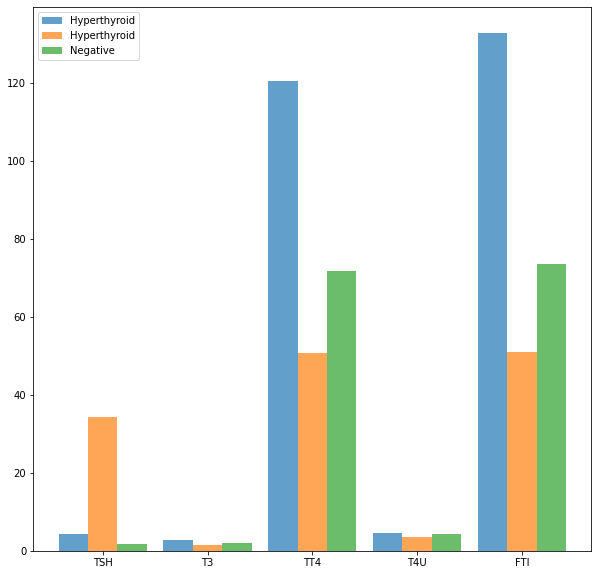

In [918]:
x = np.arange(5)

bar_width = 0.28
tick_label = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']

plt.figure(figsize=(10,10))
plt.bar(x, hyper_mean_para, bar_width, align="center", label="Hyperthyroid", alpha=0.7)
plt.bar(x+bar_width, hypo_mean_para, bar_width, align="center", label="Hyperthyroid", alpha=0.7)
plt.bar(x+2*bar_width, negative_mean_para, bar_width, align="center", label="Negative", alpha=0.7)

plt.xticks(x+bar_width, tick_label)
plt.legend()
plt.show()

### Results:
According to the results above, we can know that:
1. Hyperthyroid patients have extremely higher TSH
2. Hyperthyroid patients have higher TT4 and FTI, but Hypothyroid patients have lower TT4 and FTI

<AxesSubplot:>

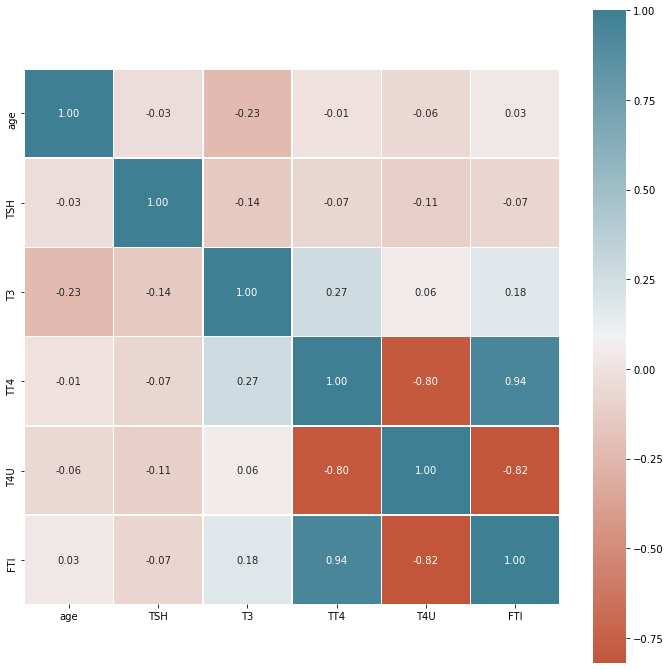

In [919]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sns.heatmap(data=data.corr(), 
            annot=True,
            annot_kws={"size":10},
            square=True,
            cmap=sns.diverging_palette(20, 220, n=256),
            fmt='.2f', 
            linewidths=0.5,
            linecolor='w',
            ax=ax)

### Results:
According to the results above, we can know that:
TT4, T4U, FTI are highly related.

## Replace string to digits in order to the correlation matrix

In [920]:
data.sex = data.sex.map({'F':0, 'M':1})
data.Target = data.Target.map({'negative':0, 'hypothyroid':1, 'hyperthyroid':2})
data = data.replace({'f':0, 't':1})

In [921]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,TSH,T3,TT4,T4U,FTI,Target
0,41.0,0,0,0,0,0,0,0,0,0,0,0,0,1.300,2.50,125.0,1.14,109.00,0
4,70.0,0,0,0,0,0,0,0,0,0,0,0,0,0.720,1.20,61.0,0.87,70.00,0
7,80.0,0,0,0,0,0,0,0,0,0,0,0,0,2.200,0.60,80.0,0.70,115.00,0
8,66.0,0,0,0,0,0,0,0,0,0,0,0,1,0.600,2.20,123.0,0.93,132.00,0
9,68.0,1,0,0,0,0,0,0,0,0,0,0,0,2.400,1.60,83.0,0.89,93.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25448,59.0,0,0,0,0,0,0,0,0,0,0,0,0,0.250,2.08,7.9,9.90,8.00,0
25449,51.0,0,0,0,0,0,0,0,0,0,0,0,0,10.600,0.60,0.5,8.90,0.55,2
25450,51.0,0,0,0,0,0,0,0,0,0,0,0,0,0.076,2.01,9.0,6.70,13.40,0
25451,35.0,1,0,0,0,0,0,0,0,0,0,0,0,0.280,2.01,9.0,8.90,10.10,0


<AxesSubplot:>

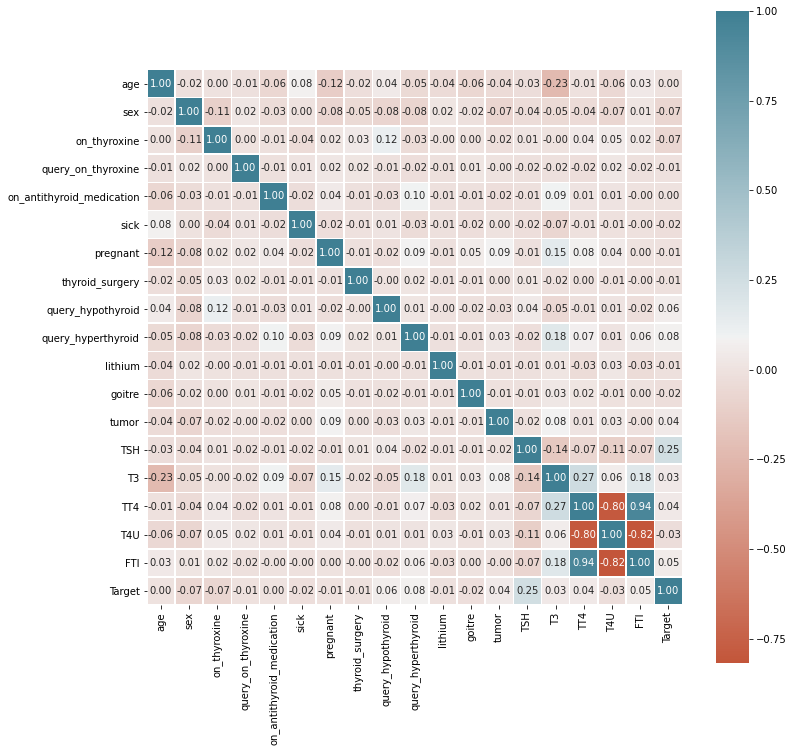

In [922]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sns.heatmap(data=data.corr(), 
            annot=True,
            annot_kws={"size":10},
            square=True,
            cmap=sns.diverging_palette(20, 220, n=256),
            fmt='.2f', 
            linewidths=0.5,
            linecolor='w',
            ax=ax)

In [923]:
# export this dataset
data.to_csv('Dataset_edited/processed_data.csv', index=False, header=True)

In [924]:
%matplotlib inline
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.2)

Text(0.5, 1.0, 'Distribution of TSH value')

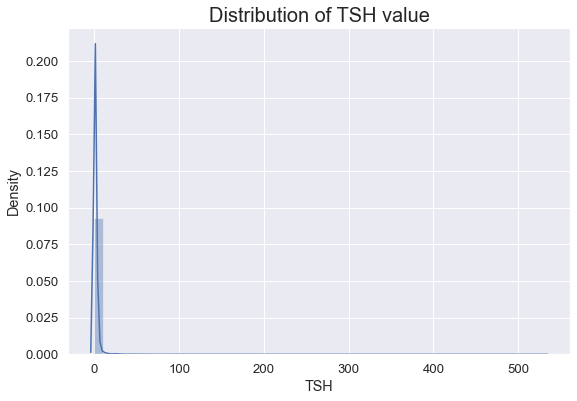

In [925]:
plt.figure(figsize=(9,6))
sns.distplot(negative_df['TSH'])
plt.title("Distribution of TSH value", {'fontsize':20})

Text(0.5, 1.0, 'Distribution of T3 value')

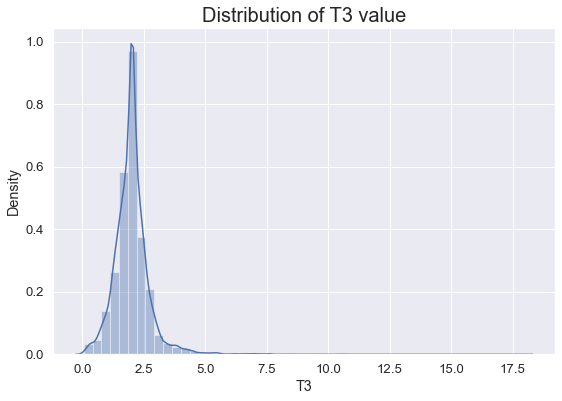

In [926]:
plt.figure(figsize=(9,6))
sns.distplot(negative_df['T3'])
plt.title("Distribution of T3 value", {'fontsize':20})

Text(0.5, 1.0, 'Distribution of TT4 value')

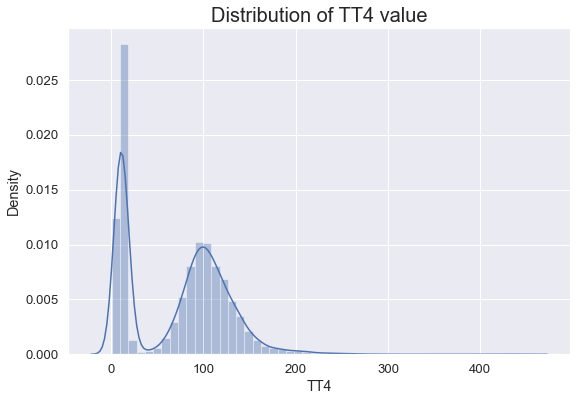

In [927]:
plt.figure(figsize=(9,6))
sns.distplot(negative_df['TT4'])
plt.title("Distribution of TT4 value", {'fontsize':20})

Text(0.5, 1.0, 'Distribution of T4U value')

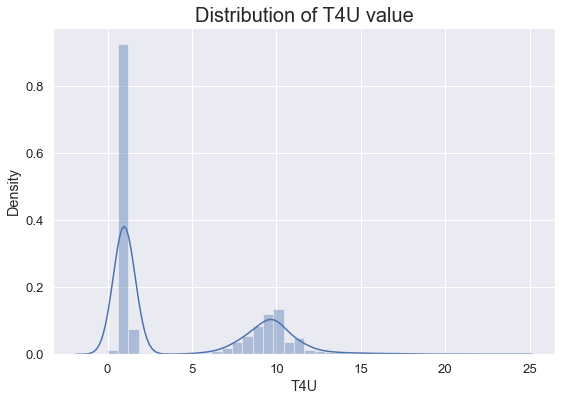

In [928]:
plt.figure(figsize=(9,6))
sns.distplot(negative_df['T4U'])
plt.title("Distribution of T4U value", {'fontsize':20})

Text(0.5, 1.0, 'Distribution of FTI value')

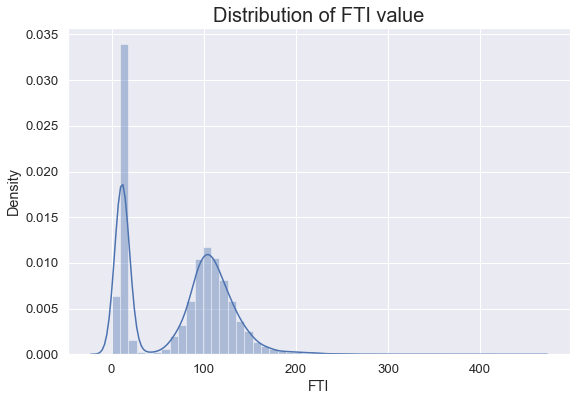

In [929]:
plt.figure(figsize=(9,6))
sns.distplot(negative_df['FTI'])
plt.title("Distribution of FTI value", {'fontsize':20})

In [930]:
data.shape

(19555, 19)